Importing Libraries (Nhập thư viện)


In [18]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Loading Data (Nhập dữ liệu data) 

In [19]:
df=pd.read_csv("../PhanTichChuoiThoiGian/data/dataTH1.csv", encoding='latin-1', sep=";")
df.head()


,Date,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [20]:
data=df.iloc[:, 2151264689 % 12 + 1]
data

0       964.4
1      1019.7
2       988.4
3      1002.0
4      1061.5
        ...  
360    1002.0
361    1002.0
362    1061.5
363    1022.6
364    1022.6
Name: 6, Length: 365, dtype: float64

In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

TÌm cụm tối ưu Kmeans


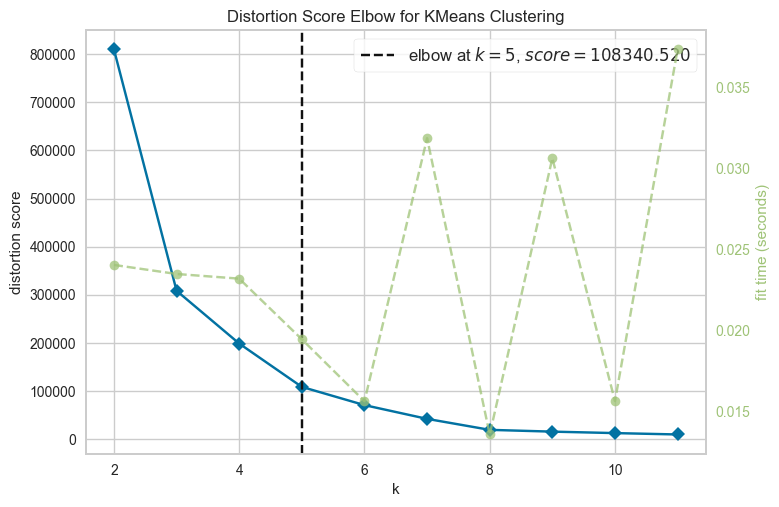

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer
print('TÌm cụm tối ưu Kmeans')
selected_data_2d = data.values.reshape(-1, 1)
kmeans = KMeans(random_state=23, n_init=10)
Elbow_M = KElbowVisualizer(kmeans, k=(2, 12))
Elbow_M.fit(selected_data_2d)
Elbow_M.show()

In [23]:
k = 5
# Thực hiện Gaussian Mixture Model
gmm = GaussianMixture(n_components=k) # Số components có thể điều chỉnh
gmm.fit(data.values.reshape(-1, 1))
gmm_labels = gmm.predict(data.values.reshape(-1, 1))

# Thực hiện KMeans clustering
kmeans = KMeans(n_clusters=k, n_init=10) # Số clusters có thể điều chỉnh
kmeans.fit(data.values.reshape(-1, 1))
kmeans_labels = kmeans.predict(data.values.reshape(-1, 1))

# Thực hiện DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Tham số có thể điều chỉnh
dbscan_labels = dbscan.fit_predict(data.values.reshape(-1, 1))

# In ra kết quả của mỗi mô hình
print("Gaussian Mixture Model labels:")
print(gmm_labels)
print("\nKMeans labels:")
print(kmeans_labels)
print("\nDBSCAN labels:")
print(dbscan_labels)

# Mô tả kịch bản tách dữ liệu
print("\nKịch bản tách data:")
print("Dữ liệu được đọc từ tệp CSV 'dataTH1.csv'.")
print(f"Chọn cột số {6} để phân tích.")
print("Sử dụng Gaussian Mixture Model với số components là 2, KMeans clustering với số clusters là 2, và DBSCAN để phân tích dữ liệu.")

Gaussian Mixture Model labels:
[2 3 3 3 0 0 0 0 0 2 3 0 0 0 0 0 3 0 0 0 0 0 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 0 3 3 3 3
 0 0 0 0 0 2 3 3 3 0 0 0 2 3 0 3 3 3 3 2 3 0 0 0 3 2 2 2 0 0 0 0 0 3 0 0 0
 0 0 0 2 0 0 0 0 2 2 2 0 0 0 3 3 3 2 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 3 3 0 3 3 3 3 2 2 3 0 0 0 0 3 3 3 2 3 3 0 0 3 2 3 3 0 0 0 2 2 2 3 2 2 2 2
 3 0 2 3 3 3 2 2 3 3 0 0 0 2 0 1 4 1 4 1 2 1 1 1 0 3 2 2 3 0 0 0 0 0 3 0 1
 1 1 1 1 1 4 4 1 1 1 1 0 0 1 1 0 0 3 2 3 3 3 2 3 0 3 0 0 0 0 1 0 2 0 0 3 3
 3 3 2 3 3 3 3 3 2 2 2 3 3 3 3 3 2 3 3 2 3 0 3 2 3 0 0 0 3 3 2 3 0 0 0 0 3
 2 3 3 3 3 3 3 2 3 0 3 3 3 3 2 3 3 0 0 0 3 2 0 0 0 0 0 0 2 3 0 3 3 3 2 2 2
 3 3 3 3 3 2 3 3 3 0 0 3 2 3 0 0 0 0 3 3 3 0 3 3 3 3 2 3 3 0 3 3]

KMeans labels:
[0 3 3 3 2 2 2 2 2 0 3 2 2 2 2 2 3 2 2 2 2 2 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 3 2 3 3 3 3
 2 2 2 2 2 0 3 3 3 2 2 2 0 3 2 3 3 3 3 0 3 2 2 2 3 0 0 0 2 2 2